In [1]:
"""credit.policy: 
    -->> 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
    -->> higher the interest rate that means risk is higher
    
installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

not.fully.paid: whether or not the borrower paid back their loan in full
"""

 

'credit.policy: \n    -->> 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.\n\npurpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").\n\nint.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.\n    -->> higher the interest rate that means risk is higher\n    \ninstallment: The monthly installments owed by the borrower if the loan is funded.\n\nlog.annual.inc: The natural log of the self-reported annual income of the borrower.\n\ndti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).\n\nfico: The FICO credit score of the borrower.\n\ndays.with.cr.line: The number of days the borrower has had a credit line.\n\nrevol.bal: The borrower\'s revolving balance (amount unpaid at the end of th

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
## Necessary functions
def get_new_column_names(column_names):
    try:
        columns_dict = {"credit.policy":"credit_policy",
        "purpose":"purpose",
        "int.rate":"interest_rate",
        "installment":"monthly_installment_of_users",
        "log.annual.inc":"annual_income_in",
        "dti":"debt_to_income_ration",
        "fico":"fico_credit_score",
        "days.with.cr.line":"days_with_cr_line",
        "revol.bal":"amount_unpaid_past_billing_cycle",
        "revol.util":"revol_util",
        "inq.last.6mths":"creditors_inquery_last_6_months",
        "delinq.2yrs":"count_of_late_payment_past_2_years",
        "pub.rec": "negative_public_records",
        "not.fully.paid" :"paid_fully_or_not"}
        print(type(column_names))
        for column_name_index in range(len(column_names)):
            column_names[column_name_index] = columns_dict[column_names[column_name_index].strip().lower()]
        return column_names
    except Exception as e:
        raise Exception("Error has encountered at function ==>> get_new_column_names", e)



In [48]:
#import the dataset
dataframe = pd.read_csv("C:/Users/Admin/Desktop/bits-AIML/machine_learning_practice_codes_github_folder/machine_learning/Projects/Decision_tree_model_for_loan_dataset/loan_data.csv")
dataframe.columns = get_new_column_names(list(dataframe.columns))
dataframe.info()

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   credit_policy                       9578 non-null   int64  
 1   purpose                             9578 non-null   object 
 2   interest_rate                       9578 non-null   float64
 3   monthly_installment_of_users        9578 non-null   float64
 4   annual_income_in                    9578 non-null   float64
 5   debt_to_income_ration               9578 non-null   float64
 6   fico_credit_score                   9578 non-null   int64  
 7   days_with_cr_line                   9578 non-null   float64
 8   amount_unpaid_past_billing_cycle    9578 non-null   int64  
 9   revol_util                          9578 non-null   float64
 10  creditors_inquery_last_6_months     9578 non-null   int64  
 11  count_of_late_payment_past_2

In [49]:

for column in dataframe.columns:
    print(dataframe[column].unique())

[1 0]
['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']
[0.1189 0.1071 0.1357 0.1008 0.1426 0.0788 0.1496 0.1114 0.1134 0.1221
 0.1347 0.1324 0.0859 0.0714 0.0863 0.1103 0.1317 0.0894 0.1039 0.1513
 0.08   0.1355 0.1229 0.0901 0.0743 0.1375 0.0807 0.1028 0.087  0.1122
 0.0996 0.0933 0.0838 0.0775 0.1059 0.1596 0.1154 0.1343 0.1249 0.0964
 0.1186 0.1501 0.128  0.1091 0.1217 0.1533 0.0712 0.1438 0.1565 0.1467
 0.1312 0.147  0.1407 0.1014 0.1046 0.133  0.0983 0.1393 0.092  0.1236
 0.1362 0.1078 0.1583 0.1109 0.1141 0.1267 0.1204 0.0951 0.1172 0.1299
 0.1488 0.152  0.1425 0.1836 0.1615 0.06   0.0832 0.1261 0.0945 0.1197
 0.1387 0.0976 0.1292 0.0737 0.0768 0.1166 0.1418 0.1545 0.1482 0.1703
 0.145  0.1671 0.1576 0.1608 0.164  0.1734 0.1051 0.157  0.1222 0.1273
 0.1379 0.1253 0.1128 0.1286 0.1287 0.097  0.1001 0.1538 0.1191 0.1254
 0.1159 0.138  0.1096 0.1064 0.1349 0.1033 0.1475 0.1601 0.1507 0.1412
 0.1633 0.1696 0.1146 0.1

In [50]:
dataframe = dataframe.isnull().sum().reset_index().transpose()

In [51]:
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
index,credit_policy,purpose,interest_rate,monthly_installment_of_users,annual_income_in,debt_to_income_ration,fico_credit_score,days_with_cr_line,amount_unpaid_past_billing_cycle,revol_util,creditors_inquery_last_6_months,count_of_late_payment_past_2_years,negative_public_records,paid_fully_or_not
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
dataframe.columns = dataframe.reset_index().drop("index", axis=1).iloc[0].to_list()
dataframe

,credit_policy,purpose,interest_rate,monthly_installment_of_users,annual_income_in,debt_to_income_ration,fico_credit_score,days_with_cr_line,amount_unpaid_past_billing_cycle,revol_util,creditors_inquery_last_6_months,count_of_late_payment_past_2_years,negative_public_records,paid_fully_or_not
index,credit_policy,purpose,interest_rate,monthly_installment_of_users,annual_income_in,debt_to_income_ration,fico_credit_score,days_with_cr_line,amount_unpaid_past_billing_cycle,revol_util,creditors_inquery_last_6_months,count_of_late_payment_past_2_years,negative_public_records,paid_fully_or_not
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
dataframe.drop("index", axis=0).astype("int64")

,credit_policy,purpose,interest_rate,monthly_installment_of_users,annual_income_in,debt_to_income_ration,fico_credit_score,days_with_cr_line,amount_unpaid_past_billing_cycle,revol_util,creditors_inquery_last_6_months,count_of_late_payment_past_2_years,negative_public_records,paid_fully_or_not
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

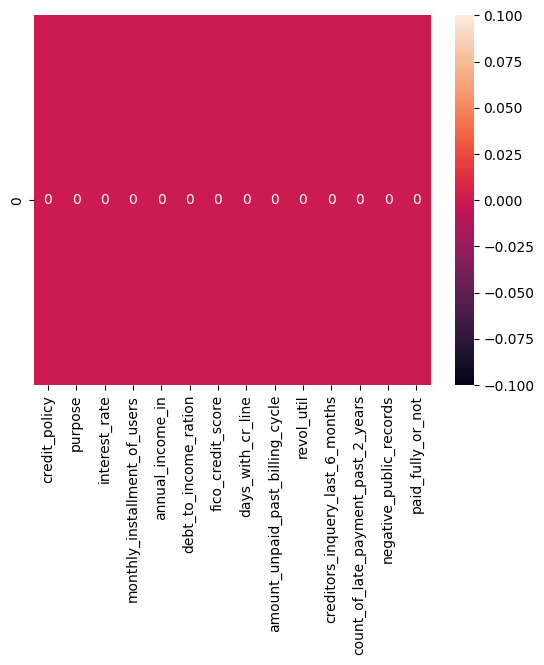

In [59]:
sns.heatmap(dataframe.drop("index", axis=0).astype("int64"),annot=True,cbar=True)

In [8]:
dataframe.isnull().sum()

credit_policy                         0
purpose                               0
interest_rate                         0
monthly_installment_of_users          0
annual_income_in                      0
debt_to_income_ration                 0
fico_credit_score                     0
days_with_cr_line                     0
amount_unpaid_past_billing_cycle      0
revol_util                            0
creditors_inquery_last_6_months       0
count_of_late_payment_past_2_years    0
negative_public_records               0
paid_fully_or_not                     0
dtype: int64

In [9]:
dataframe

,credit_policy,purpose,interest_rate,monthly_installment_of_users,annual_income_in,debt_to_income_ration,fico_credit_score,days_with_cr_line,amount_unpaid_past_billing_cycle,revol_util,creditors_inquery_last_6_months,count_of_late_payment_past_2_years,negative_public_records,paid_fully_or_not
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [10]:
dataframe.transpose()

,0,1,2,3,4,5,6,7,8,9,...,9568,9569,9570,9571,9572,9573,9574,9575,9576,9577
credit_policy,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
purpose,debt_consolidation,credit_card,debt_consolidation,debt_consolidation,credit_card,credit_card,debt_consolidation,all_other,home_improvement,debt_consolidation,...,all_other,home_improvement,all_other,all_other,debt_consolidation,all_other,all_other,debt_consolidation,home_improvement,debt_consolidation
interest_rate,0.1189,0.1071,0.1357,0.1008,0.1426,0.0788,0.1496,0.1114,0.1134,0.1221,...,0.1979,0.1426,0.1671,0.1568,0.1565,0.1461,0.1253,0.1071,0.16,0.1392
monthly_installment_of_users,829.1,228.22,366.86,162.34,102.92,125.13,194.02,131.22,87.19,84.12,...,37.06,823.34,113.63,161.01,69.98,344.76,257.7,97.81,351.58,853.43
annual_income_in,11.350407,11.082143,10.373491,11.350407,11.299732,11.904968,10.714418,11.0021,11.407565,10.203592,...,10.645425,12.429216,10.645425,11.225243,10.110472,12.180755,11.141862,10.596635,10.819778,11.264464
debt_to_income_ration,19.48,14.29,11.63,8.1,14.97,16.98,4.0,11.08,17.25,10.0,...,22.17,3.62,28.06,8.0,7.02,10.39,0.21,13.09,19.18,16.28
fico_credit_score,737,707,682,712,667,727,667,722,682,707,...,667,722,672,677,662,672,722,687,692,732
days_with_cr_line,5639.958333,2760.0,4710.0,2699.958333,4066.0,6120.041667,3180.041667,5116.0,3989.0,2730.041667,...,5916.0,3239.958333,3210.041667,7230.0,8190.041667,10474.0,4380.0,3450.041667,1800.0,4740.0
amount_unpaid_past_billing_cycle,28854,33623,3511,33667,4740,50807,3839,24220,69909,5630,...,28854,33575,25759,6909,2999,215372,184,10036,0,37879
revol_util,52.1,76.7,25.6,73.2,39.5,51.0,76.8,68.6,51.1,23.0,...,59.8,83.9,63.8,29.2,39.5,82.1,1.1,82.9,3.2,57.0
